# Loan Data Cleaning 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### % of missing values for each column

In [6]:
(df.isnull().sum()/df.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Total % of missing values

In [7]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

1.8667000751691305

### Heatmap showcasing no. of missing values in each column


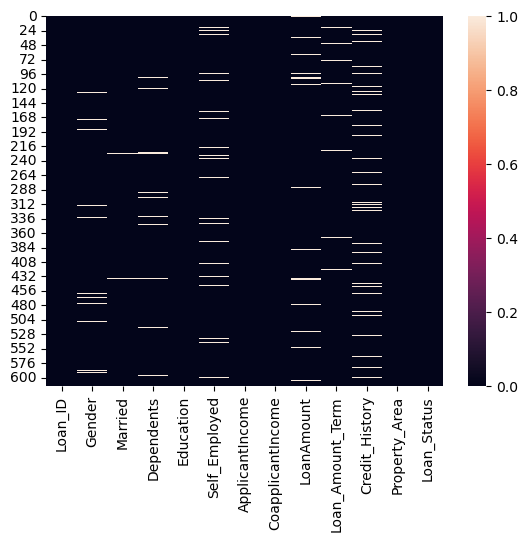

In [8]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [11]:
df['Gender'].isnull().sum()

0

### Filling all columns with categorical data with fillna mode filling

In [12]:
for i in df.select_dtypes(include=object).columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [13]:
df.select_dtypes(include=object).isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [14]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

### Filling all columns with numerical data with sklearn imputation

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
si = SimpleImputer(strategy='mean')
imputed_arr = si.fit_transform(df[numerical_columns])
imputed_arr

array([[5.84900000e+03, 0.00000000e+00, 1.46412162e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 1.50800000e+03, 1.28000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [3.00000000e+03, 0.00000000e+00, 6.60000000e+01, 3.60000000e+02,
        1.00000000e+00],
       ...,
       [8.07200000e+03, 2.40000000e+02, 2.53000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [7.58300000e+03, 0.00000000e+00, 1.87000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 0.00000000e+00, 1.33000000e+02, 3.60000000e+02,
        0.00000000e+00]])

In [17]:
new_df = pd.DataFrame(imputed_arr,columns=numerical_columns)

In [18]:
new_df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [19]:
df[numerical_columns]= new_df         #writing filled columns onto original dataframe
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### One Hot Encoding Nominal Data

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
ohe = OneHotEncoder()

In [22]:
arr_enc = ohe.fit_transform(df[['Gender','Married','Education','Self_Employed','Loan_Status']]).toarray()

In [23]:
df_enc = pd.DataFrame(arr_enc,columns=['Gender_Female','Gender_Male','Married_No','Married_Yes','Graduate_Yes','Graduate_No','Self_Employed_No','Self_Employed_Yes','Loan_Status_No','Loan_Status_Yes'])

In [24]:
df_enc.drop(['Gender_Female','Married_No','Graduate_No','Self_Employed_No','Loan_Status_No'], axis=1,inplace=True)
df.drop(['Gender','Married','Education','Self_Employed','Loan_Status'],axis=1,inplace=True)

In [25]:
df = pd.concat([df,df_enc],axis=1)

### Ordinal Encoding Ordinal Data

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
location= [['Urban', 'Semiurban','Rural']]

In [28]:
oe = OrdinalEncoder(categories=location)

In [29]:
df['Property_Area'] = oe.fit_transform(df[['Property_Area']])

### Outlier Detection With Boxplot

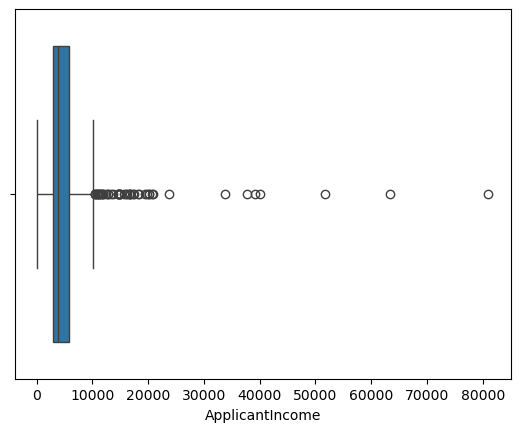

In [30]:
sns.boxplot(x= 'ApplicantIncome', data = df)
plt.show()

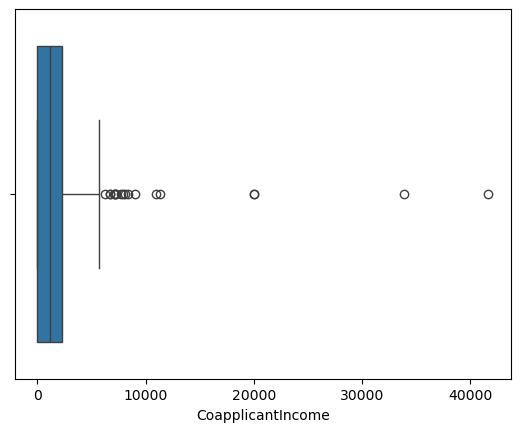

In [31]:
sns.boxplot(x='CoapplicantIncome', data = df )
plt.show()

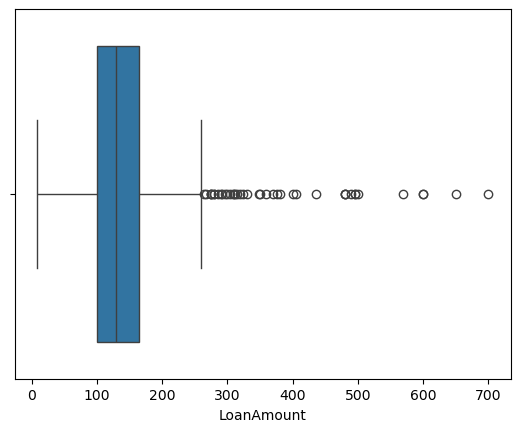

In [32]:
sns.boxplot(x = 'LoanAmount', data = df)
plt.show()

In [33]:
df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Graduate_Yes,Self_Employed_Yes,Loan_Status_Yes
0,LP001002,0,5849.0,0.0,146.412162,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,LP001003,1,4583.0,1508.0,128.000000,360.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0
2,LP001005,0,3000.0,0.0,66.000000,360.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,LP001006,0,2583.0,2358.0,120.000000,360.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,LP001008,0,6000.0,0.0,141.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900.0,0.0,71.000000,360.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0
610,LP002979,3+,4106.0,0.0,40.000000,180.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
611,LP002983,1,8072.0,240.0,253.000000,360.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
612,LP002984,2,7583.0,0.0,187.000000,360.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


### Outlier Removal Using IQR

In [34]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Graduate_Yes,Self_Employed_Yes,Loan_Status_Yes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.962541,0.817590,0.653094,0.781759,0.133550,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.386497,0.476373,0.413389,0.340446,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.shape

(614, 13)

In [36]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

In [37]:
min_val =  Q1 - (1.5 * IQR)
max_val =  Q3 + (1.5 * IQR)
min_val,max_val

(-1498.75, 10171.25)

In [38]:
df = df[df['ApplicantIncome'] <= max_val]

In [39]:
df.shape

(564, 13)

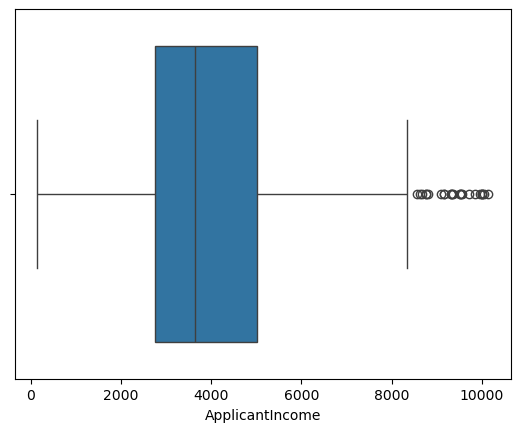

In [40]:
sns.boxplot(x = 'ApplicantIncome', data = df)
plt.show()

### Outlier Removal Using Direct Method

In [41]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Graduate_Yes,Self_Employed_Yes,Loan_Status_Yes
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,4124.723404,1692.294184,134.259297,341.893617,0.841460,0.976950,0.817376,0.650709,0.765957,0.118794,0.689716
std,1926.989806,2979.232330,58.055576,64.938742,0.350068,0.786995,0.386701,0.477169,0.423775,0.323834,0.463020
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2744.000000,0.000000,100.000000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,3638.500000,1405.500000,126.000000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,5010.500000,2337.000000,158.000000,360.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,10139.000000,41667.000000,495.000000,480.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
min_val = df['CoapplicantIncome'].mean() - (3 * df['CoapplicantIncome'].std())    #min = mean - 3 * s.d
max_val = df['CoapplicantIncome'].mean() + (3 * df['CoapplicantIncome'].std())    #max = mean + 3 * s.d
min_val,max_val

(-7245.402804696268, 10629.991173450311)

In [43]:
df = df[df['CoapplicantIncome'] <= max_val]

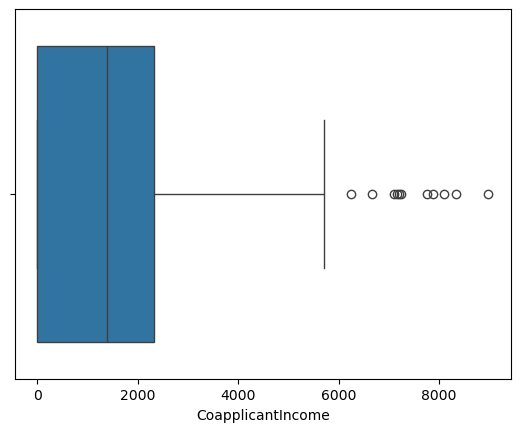

In [44]:
sns.boxplot(x= 'CoapplicantIncome', data=df)
plt.show()


### Outlier Removal Using Z-Score

In [45]:
z_score = (df['LoanAmount'] - df['LoanAmount'].mean())/ df['LoanAmount'].std()       # z_score = (x - mean)/ s.d
z_score

0      0.239363
1     -0.093597
2     -1.214784
3     -0.238266
4      0.141491
         ...   
609   -1.124366
610   -1.684959
611    2.166862
612    0.973340
613   -0.003178
Name: LoanAmount, Length: 559, dtype: float64

In [46]:
df.loc[:, 'z_score']= z_score    #setting value to new column in df

In [47]:
df = df[df['z_score']<3]   #removing rows with z_score <3

### Standard Scaling 'CoapplicantIncome'

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
ss = StandardScaler()

In [50]:
df.loc[:, 'CoapplicantIncome_ss'] = ss.fit_transform(df[['CoapplicantIncome']])

In [51]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Graduate_Yes,Self_Employed_Yes,Loan_Status_Yes,z_score,CoapplicantIncome_ss
0,LP001002,0,5849.0,0.0,146.412162,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.239363,-0.879872
1,LP001003,1,4583.0,1508.0,128.000000,360.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,-0.093597,0.050255
2,LP001005,0,3000.0,0.0,66.000000,360.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-1.214784,-0.879872
3,LP001006,0,2583.0,2358.0,120.000000,360.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.238266,0.574530
4,LP001008,0,6000.0,0.0,141.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.141491,-0.879872


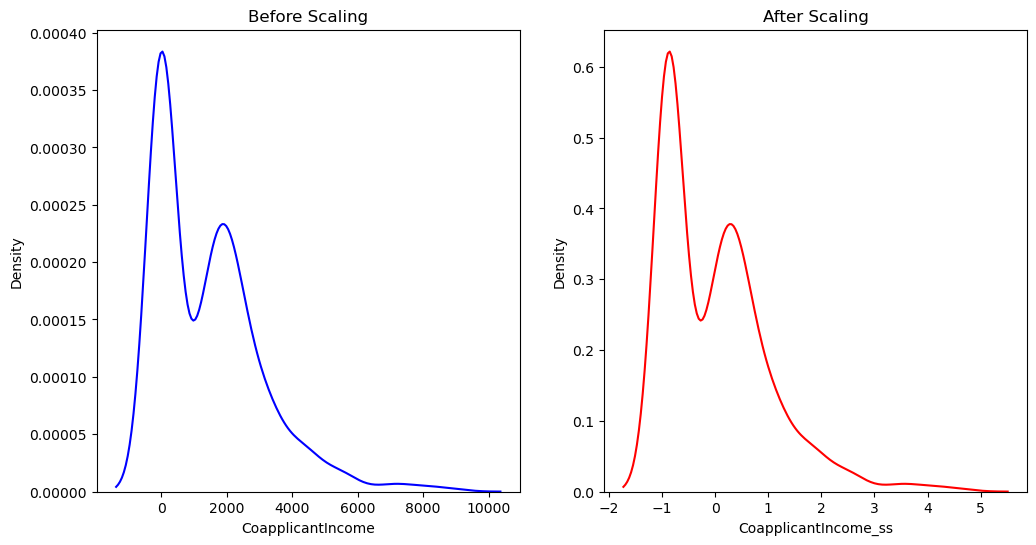

In [52]:
plt.figure(figsize=(12, 6))   # Create subplots

# First subplot: Before scaling
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.title('Before Scaling')
sns.kdeplot(x=df['CoapplicantIncome'], color='blue')

# Second subplot: After scaling
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.title('After Scaling')
sns.kdeplot(x=df['CoapplicantIncome_ss'], color='red')

plt.show()


### Min-Max Scaling ApplicantIncome

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
ms = MinMaxScaler()

In [55]:
df[['ApplicantIncome_ms']] = ms.fit_transform(df[['ApplicantIncome']])

<Axes: title={'center': 'After Scaling'}, xlabel='ApplicantIncome_ms', ylabel='Density'>

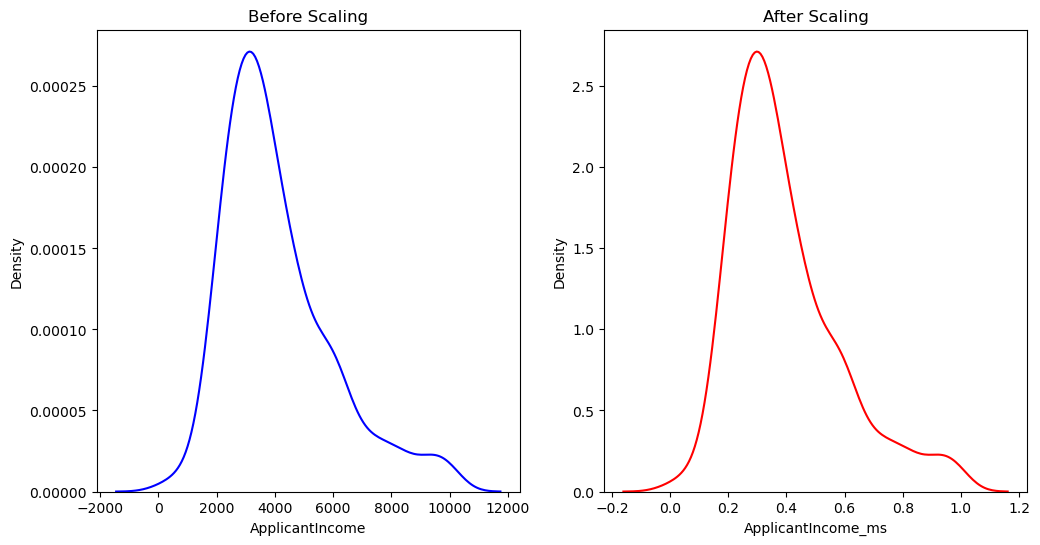

In [56]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Before Scaling')
sns.kdeplot(x=df['ApplicantIncome'], color='blue')

plt.subplot(1,2,2)
plt.title('After Scaling')
sns.kdeplot(x=df['ApplicantIncome_ms'], color='red')

### Removing Duplicates(i.e identical rows)

In [57]:
df.drop_duplicates(inplace=True)

### 

### Changing Datatype Of 'Dependents' Column

In [58]:
df['Dependents'].value_counts()

Dependents
0     330
2      92
1      86
3+     43
Name: count, dtype: int64

In [59]:
# df['Dependents'].replace('3+', '3', inplace=True)          #Causes future warning
df.replace({'Dependents': {'3+': '3'}}, inplace=True)

In [60]:
df['Dependents'] = df['Dependents'].astype('int64')

In [61]:
df.dtypes

Loan_ID                  object
Dependents                int64
ApplicantIncome         float64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area           float64
Gender_Male             float64
Married_Yes             float64
Graduate_Yes            float64
Self_Employed_Yes       float64
Loan_Status_Yes         float64
z_score                 float64
CoapplicantIncome_ss    float64
ApplicantIncome_ms      float64
dtype: object

### Using FunctionTransformer for normal distribution data conversion

In [62]:
from sklearn.preprocessing import FunctionTransformer

In [63]:
# ft = FunctionTransformer(func=np.log1p)
ft = FunctionTransformer(func=lambda x: x**2)

In [64]:
df['CoapplicantIncome_tf'] = ft.fit_transform(df['CoapplicantIncome_ss'])

<Axes: title={'center': 'After'}, xlabel='CoapplicantIncome_tf', ylabel='Density'>

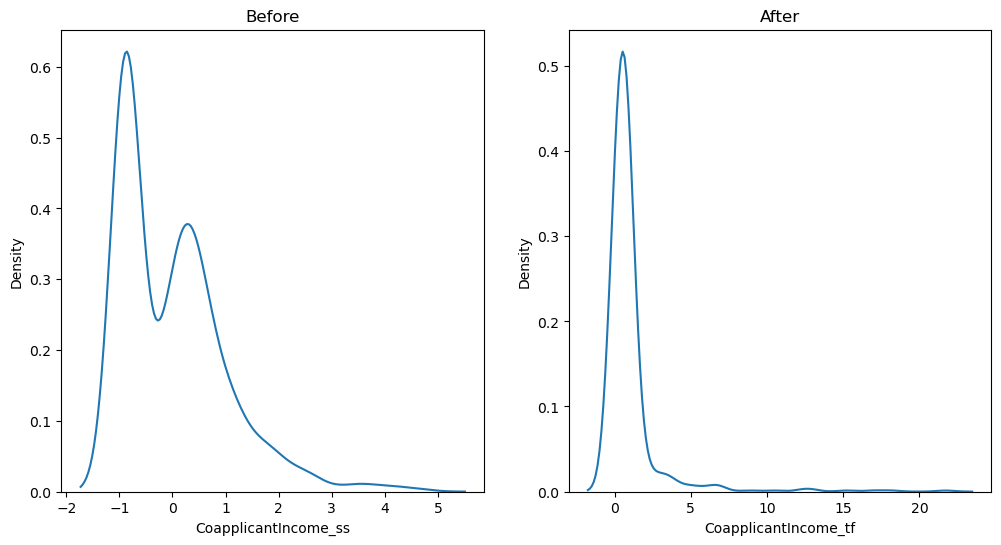

In [65]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Before')
sns.kdeplot(df['CoapplicantIncome_ss'])

plt.subplot(1,2,2)
plt.title('After')
sns.kdeplot(df['CoapplicantIncome_tf'])

#### Note: CoapplicantIncome_ss is not a completely normal distribution but comparatively better

In [66]:
df.to_csv('cleaned_data.csv', index=False)